**Ejercicio 3:** Pruebe varios valores de k(por ejemplo entre 2 y 10) para el conjunto de datos Iris, calcule para cada k una métrica de clustering (con sklearn) y encuentre el k óptimo para k-medias.

#### <b>Librerías</b>

In [36]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

from kmedias_func import kmedias

from cohesion_media import cohesion_media
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import davies_bouldin_score

#### **Golden Standard**

In [37]:
archivo = './data/irisbin_trn.csv'
trn = np.loadtxt(archivo,delimiter=',')
cant_e = 4
yd = np.empty(len(trn),dtype=object)         # Salidas esperadas
inputs = np.empty(len(trn),dtype=object)     # Patrones de entrada

for i in range(len(trn)):
    fila = trn[i]
    yd[i] = fila[cant_e:]
    inputs[i] = fila[:cant_e]

idx_yd = [np.argmax(v) for v in yd]         # Codifico las salidas para comparar

print('Primer patron de entrada:',inputs[0])
print('Primera salida esperada:',yd[0])
print('Primera salida codificada:',idx_yd[0])

Primer patron de entrada: [5.2 3.4 1.4 0.2]
Primera salida esperada: [-1. -1.  1.]
Primera salida codificada: 2


#### **Métricas de clustering para k-medias con distintos k**

In [38]:
matrix = []
ri = []
fms = []
db = []
cm = []
max_epoca = 50

for k in range(2,11):
    inputs,c,input_centroid = kmedias(k,inputs,max_epoca)
    
    matrix.append(contingency_matrix(idx_yd,input_centroid))
    ri.append(rand_score(idx_yd,input_centroid))
    fms.append(fowlkes_mallows_score(idx_yd,input_centroid))
    db.append(davies_bouldin_score(np.vstack(inputs),input_centroid))
    cm.append(cohesion_media(np.vstack(inputs),c,input_centroid))


Reuno los datos en una tabla. Recordemos:
- **Matriz de contingencia:** Me muestra coincidencias entre los índices.
- **Rand Index:** Mientras más cerca de 1, mejor clustering.
- **Fowlkes & Mallows:** Mientras más cerca de 1, mejor clustering.
- **Medida Combinada:** Mínimo cero, menor valor implica mejor clustering.

In [39]:
table_data = [[x,y,z,k,l,m] for x, y, z, k, l, m in zip(range(2,11), matrix, ri, fms, db, cm)]
headers = ['k','Matriz de Contingencia','Rand Index','Fowlkes & Mallows','Medida Combinada','Cohesión media']
table = tabulate(table_data, headers, tablefmt='simple_grid',stralign='center',numalign='center')
print(table)

┌─────┬───────────────────────────────────┬──────────────┬─────────────────────┬────────────────────┬──────────────────┐
│  k  │      Matriz de Contingencia       │  Rand Index  │  Fowlkes & Mallows  │  Medida Combinada  │  Cohesión media  │
├─────┼───────────────────────────────────┼──────────────┼─────────────────────┼────────────────────┼──────────────────┤
│  2  │             [[ 0 34]              │   0.821785   │      0.808054       │      0.375535      │     0.74734      │
│     │              [ 0 32]              │              │                     │                    │                  │
│     │              [45  0]]             │              │                     │                    │                  │
├─────┼───────────────────────────────────┼──────────────┼─────────────────────┼────────────────────┼──────────────────┤
│  3  │            [[ 0 34  0]            │   0.745782   │      0.676994       │      0.633895      │     0.574213     │
│     │             [ 0 32  0]  

C:\Users\ssfes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


#### **Elbow method**

Podemos ver la tabla para comparar las distintas métricas o, podemos usar el método del codo para encontrar el k óptimo. Para eso, graficamos la cohesión media para cada resultado obtenido con distintos valores de k y buscamos en la gráfica el 'codo' de la misma.

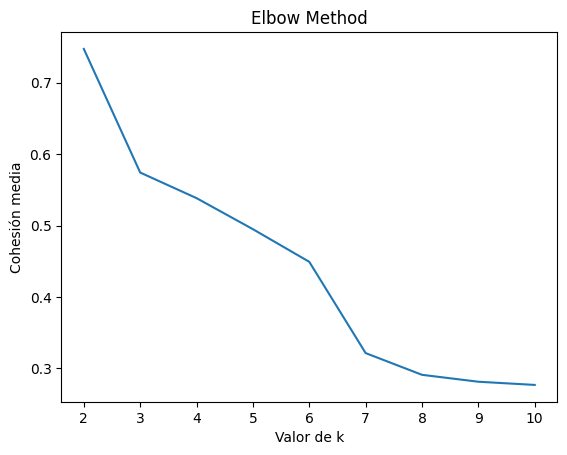

In [40]:
x = range(2,11)
plt.plot(x, cm)

plt.title('Elbow Method')
plt.xlabel('Valor de k')
plt.ylabel('Cohesión media')

plt.show()